In [1]:
# Урок 7. Предобработка данных и построение предиктивных моделей в Scikit-learn
# Взять все признаки из датасета load_boston(). Применить модель Random Forest.
# Рассчитайте R2 на тренировочной и тестовой выборке.
# Сравнить показатели качества новой модели с моделью с урока и сделать вывод.
# Результат - ссылка на готовый ноутбук в Colab.

# импортируем нужные библиотеки
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.ensemble import RandomForestRegressor

# загружаем данные
boston_data = load_boston()

X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

X.head()



/Users/mikhalitsyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
# ЗАДАНИЕ_01: Взять все признаки из датасета load_boston(). Применить модель Random Forest.

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.20, shuffle = True, random_state = 42)

In [3]:
# обучение модели
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [4]:
# ЗАДАНИЕ_02: Рассчитайте R2 на тренировочной и тестовой выборке.

# предсказания зависимой переменной у на тестовом и обучающем наборе
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# метрики качества на тестовом и обучающем множеств
print('R2 train:', r2(y_train, y_train_pred))
print('R2 test:', r2(y_test, y_test_pred))

R2 train: 0.9772267182453291
R2 test: 0.8922527442109116


/var/folders/cx/fw0bgsfn59qfvhcbywry0ggw0000gn/T/ipykernel_39953/3020571710.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,50], [0, 50], '--k', color='green', linewidth=3)


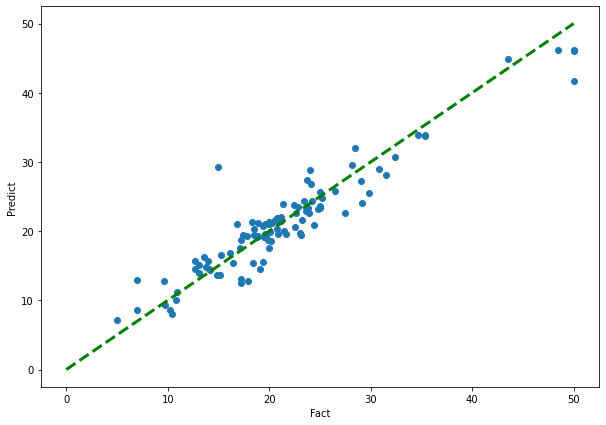

In [7]:
# Проверим графически:

plt.figure(figsize=(10,7))
plt.scatter(y_test, y_test_pred)
plt.plot([0,50], [0, 50], '--k', color='green', linewidth=3)
plt.xlabel('Fact')
plt.ylabel('Predict')
plt.show()

In [9]:
# пробуем настроить гиперпараметры
def fit_predict(train, test, y_train, y_test, criterion = 'squared_error', n_estimators = 100, max_depth = None, min_sample_split = 2):  # пайтон на criterion = 'mse' выдал ошибку и сказал заменить на criterion = 'squared_error'
  rf = RandomForestRegressor(criterion=criterion, n_estimators=n_estimators, max_depth=max_depth)
  rf.fit(train, y_train)
  y_pred_train = rf.predict(train)
  y_pred = rf.predict(test)
  print('train', r2(y_train, y_pred_train), 'test', r2(y_test, y_pred))

In [10]:
# максимальная глубина деревьев
for max_depth in range(2,21):
  print('R^2 score using max_depth={0}:'.format(max_depth), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth = max_depth)

R^2 score using max_depth=2: train 0.7628086412328304 test 0.7082036238797994
R^2 score using max_depth=3: train 0.8702003610764413 test 0.8210290436052948
R^2 score using max_depth=4: train 0.908903112007899 test 0.8470719888591776
R^2 score using max_depth=5: train 0.9342001838564089 test 0.8677792377500892
R^2 score using max_depth=6: train 0.951880064329932 test 0.8691679767536593
R^2 score using max_depth=7: train 0.9606308759335968 test 0.8819891578963805
R^2 score using max_depth=8: train 0.9696417256470214 test 0.8732251874428953
R^2 score using max_depth=9: train 0.971599829600361 test 0.873653797920324
R^2 score using max_depth=10: train 0.9737066377152441 test 0.878814929117502
R^2 score using max_depth=11: train 0.9748547366897604 test 0.8635604273986311
R^2 score using max_depth=12: train 0.9779325949100351 test 0.882786412311855
R^2 score using max_depth=13: train 0.9792612860463988 test 0.873587739109753
R^2 score using max_depth=14: train 0.9763842014135258 test 0.87969

In [11]:
# минимальное число объектов, чтобы узел дерева расщепился
for min_sample_split in range(5,51,5):
  print('R^2 score using min_sample_leaf = {0}:'.format(min_sample_split), end = ' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=min_sample_split)

R^2 score using min_sample_leaf = 5: train 0.8713287163469842 test 0.820738965570885
R^2 score using min_sample_leaf = 10: train 0.8684895421352261 test 0.8095285240387742
R^2 score using min_sample_leaf = 15: train 0.8713934056925543 test 0.8065019731730749
R^2 score using min_sample_leaf = 20: train 0.8674782823772512 test 0.8294280002421228
R^2 score using min_sample_leaf = 25: train 0.8678634662690465 test 0.7975013721128968
R^2 score using min_sample_leaf = 30: train 0.8708281837785198 test 0.8270286486941401
R^2 score using min_sample_leaf = 35: train 0.8702653895222809 test 0.8272437781531587
R^2 score using min_sample_leaf = 40: train 0.8661835179676283 test 0.8264763702065956
R^2 score using min_sample_leaf = 45: train 0.8661199464684115 test 0.8200246945968999
R^2 score using min_sample_leaf = 50: train 0.8657631317132767 test 0.8237480147904809


In [12]:
# критерий расщепления
for criterion in ['squared_error', 'absolute_error']:  # Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  print('R^2 score using {0} criterion:'.format(criterion), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=15, criterion=criterion)

R^2 score using squared_error criterion: train 0.8677845473796509 test 0.8178149308586403
R^2 score using absolute_error criterion: train 0.8383425573533164 test 0.7925233510383471


In [13]:
# число "деревьев" в "случайном лесу"
for n_estimators in range(100,1001,100):
  print('R^2 score using n_estimators = {0}:'.format(n_estimators), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=15, criterion='squared_error', n_estimators=n_estimators)

R^2 score using n_estimators = 100: train 0.8674958638984298 test 0.807828313505503
R^2 score using n_estimators = 200: train 0.869167470640553 test 0.821339386286229
R^2 score using n_estimators = 300: train 0.8694919739547915 test 0.8290287070981901
R^2 score using n_estimators = 400: train 0.8695267598420544 test 0.8246182736440852
R^2 score using n_estimators = 500: train 0.8696665331792748 test 0.8195872479774474
R^2 score using n_estimators = 600: train 0.8698680799529641 test 0.8236967139710935
R^2 score using n_estimators = 700: train 0.8690745825666794 test 0.8230911828636975
R^2 score using n_estimators = 800: train 0.8686380237164246 test 0.8212086613091882
R^2 score using n_estimators = 900: train 0.8698977234044526 test 0.8249443939455685
R^2 score using n_estimators = 1000: train 0.8708939666414393 test 0.8239339471243716


In [14]:
model2 = RandomForestRegressor(criterion='squared_error', n_estimators=300, max_depth=3, random_state=5, min_samples_split=15)

model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=15, n_estimators=300,
                      random_state=5)

In [15]:
y_train_pred2=model2.predict(X_train)
y_test_pred2=model2.predict(X_test)

print('R2 train:', r2(y_train, y_train_pred2))
print('R2 test:', r2(y_test, y_test_pred2))

R2 train: 0.8685861956584837
R2 test: 0.8248676153984816
